In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.corr()["charges"]

ValueError: could not convert string to float: 'female'

In [5]:
data.corr(['age','bmi','children'])['charges']

ValueError: could not convert string to float: 'female'

In [6]:
data[['age','bmi','children']].corr()["charges"]

KeyError: 'charges'

In [7]:
data[['age','bmi','children','charges']].corr()["charges"]

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [8]:
import seaborn as sns

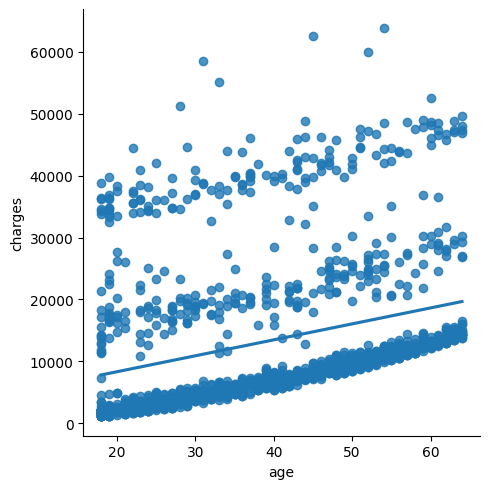

In [9]:
sns.lmplot(x="age", y="charges", data=data, fit_reg=True , ci=None)

<Axes: ylabel='Frequency'>

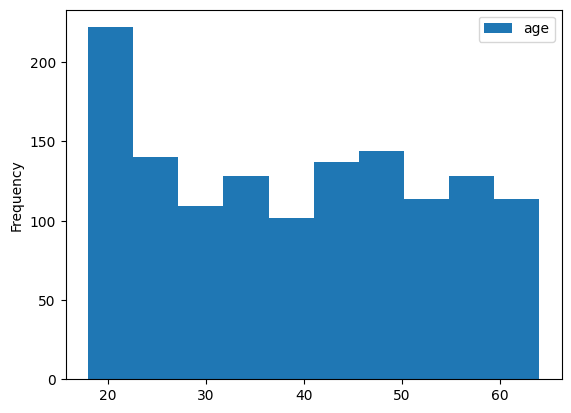

In [10]:
data.plot.hist(y = 'age')

<Axes: ylabel='Frequency'>

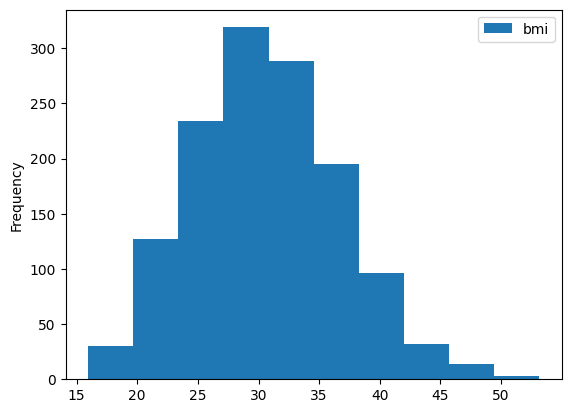

In [11]:
data.plot.hist(y = 'bmi')

<Axes: ylabel='Frequency'>

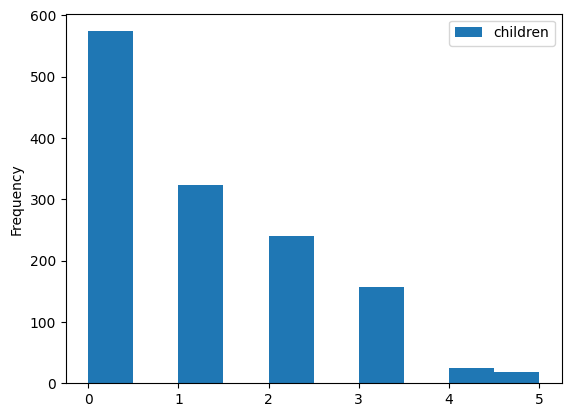

In [12]:
data.plot.hist(y = 'children')

In [13]:
data.plot.hist(y = 'smoker')

TypeError: no numeric data to plot

<Axes: xlabel='smoker', ylabel='count'>

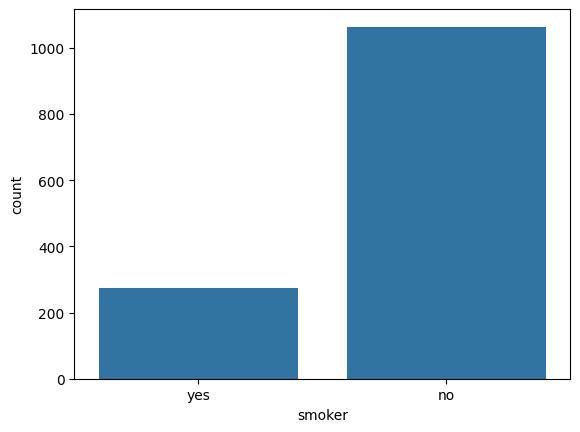

In [14]:
sns.countplot(x="smoker", data=data)

<Axes: xlabel='sex', ylabel='count'>

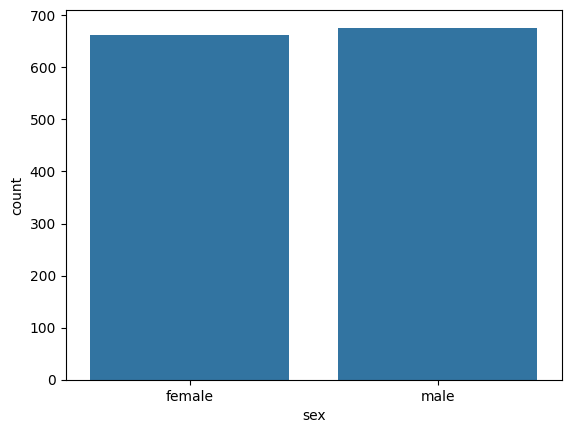

In [15]:
sns.countplot(x="sex", data=data)

<Axes: xlabel='region', ylabel='count'>

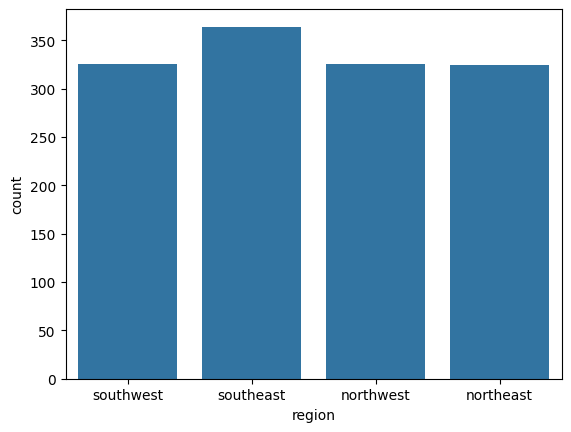

In [16]:
sns.countplot(x="region", data=data)

In [17]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [18]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 639.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.7 MB 12.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.8/10.7 MB 8.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.7 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.7 MB 6.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.7 MB 6.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.7 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.7 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.7 MB 5.0 MB/s eta 0:00:02
   ------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=35)

In [21]:
columns = data.columns.tolist()

In [22]:
columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [23]:
train_data.head()

,age,sex,bmi,children,smoker,region,charges
861,38,female,28.00,3,no,southwest,7151.0920
216,53,female,26.60,0,no,northwest,10355.6410
1107,50,female,26.22,2,no,northwest,10493.9458
295,18,male,22.99,0,no,northeast,1704.5681
300,36,male,27.55,3,no,northeast,6746.7425


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 861 to 1295
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


In [25]:
data.replace({'sex':{'male':1,'female':0}}, inplace = True)
data.replace({'smoker':{'yes':1,'no':0}}, inplace = True)
data.replace({'region':{'northeast':0,'southeast':1, 'southwest':2,'northwest':3}}, inplace = True)

C:\Users\Dhruv Jain\AppData\Local\Temp\ipykernel_59260\284229409.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':1,'female':0}}, inplace = True)
C:\Users\Dhruv Jain\AppData\Local\Temp\ipykernel_59260\284229409.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':1,'no':0}}, inplace = True)
C:\Users\Dhruv Jain\AppData\Local\Temp\ipykernel_59260\284229409.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [26]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0}).astype(int)
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0}).astype(int)
data['region'] = data['region'].map({'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [27]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
print("Unique values in 'sex':", data['sex'].unique())
print("Unique values in 'smoker':", data['smoker'].unique())
print("Unique values in 'region':", data['region'].unique())

Unique values in 'sex': [0 1]
Unique values in 'smoker': [1 0]
Unique values in 'region': [2 1 3 0]


In [29]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=35)

In [30]:
train_data.head()

,age,sex,bmi,children,smoker,region,charges
861,38,0,28.00,3,0,2,7151.0920
216,53,0,26.60,0,0,3,10355.6410
1107,50,0,26.22,2,0,3,10493.9458
295,18,1,22.99,0,0,0,1704.5681
300,36,1,27.55,3,0,0,6746.7425


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 861 to 1295
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   int64  
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   int64  
 5   region    1070 non-null   int64  
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 66.9 KB


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression

In [34]:
target = columns.pop()
predictors = columns

In [35]:
reg.fit(train[predictors],train[target])

NameError: name 'train' is not defined

In [36]:
reg.fit(train_data[predictors],train_data[target])

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [37]:
reg = LinearRegression()

In [38]:
reg.fit(train_data[predictors],train_data[target])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
predictions = reg.predict(test_data[predictors])

In [40]:
from sklearn.metrics import mean_absolute_error
print('mean_absolute_error: ', mean_absolute_error(test_data['charges'], predictions))

mean_absolute_error:  4476.623452928648


In [41]:
test['predictions'] = predictions

NameError: name 'test' is not defined

In [42]:
test_data['predictions'] = predictions

In [43]:
test_data

,age,sex,bmi,children,smoker,region,charges,predictions
686,42,1,26.125,2,0,0,7729.64575,8218.583408
543,54,0,47.410,0,1,1,63770.42801,40985.983990
539,53,1,31.350,0,0,1,27346.04207,11695.130081
832,28,0,23.845,2,0,3,4719.73655,3419.448775
589,38,0,30.690,1,0,1,5976.83110,8105.460750
...,...,...,...,...,...,...,...,...
269,49,1,25.840,1,0,0,9282.48060,9510.303467
1041,18,1,23.085,0,0,0,1704.70015,234.531722
61,25,1,33.660,4,0,1,4504.66240,6900.298134
756,39,0,22.800,3,0,0,7985.81500,6870.541230


In [44]:
print('mean_absolute_error: ', mean_absolute_error(test_data['charges'], test_data['predictions']))

mean_absolute_error:  4476.623452928648


In [45]:
import pickle as pkl

In [46]:
pkl.dump( reg, open('model.pkl', 'wb'))